# Loading the data.csv

In [163]:
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,Symbol,Open,High,Low,Last Traded Price,Change,%Change,Traded Volume(lacs),Traded Value(crs),52 Week High,52 Week Low,365 Days % Change,30 Days % Change
0,NIFTY 50,"9,088.45","9,127.55","8,407.05","8,468.80",-498.25,-5.56,"15,172.76","39,255.84","12,430.50","8,555.15",-26.12,-29.69
1,ZEEL,135.00,185.00,135.00,168.00,34.90,26.22,406.65,608.18,467.80,131.60,-63.27,-29.77
2,YESBANK,64.50,87.30,49.90,61.10,2.45,4.18,"3,641.52","2,494.81",286.00,5.65,-75.16,64.47
3,ITC,152.10,154.65,147.35,151.45,2.30,1.54,502.49,758.96,310.00,134.60,-48.44,-26.05
4,TATASTEEL,290.00,293.15,275.70,283.95,1.20,0.42,187.73,528.73,561.65,255.35,-45.93,-35.00


# creating new dataframe and get symbols there

In [164]:
new_df=pd.DataFrame(columns=['Symbol'])
new_df.Symbol=df.Symbol+'.NS'
new_df.drop([0],inplace=True)
new_df.to_csv('tickets.csv',index=False)
new_df.head()

,Symbol
1,ZEEL.NS
2,YESBANK.NS
3,ITC.NS
4,TATASTEEL.NS
5,TCS.NS


In [165]:
import os
import datetime as dt
import pandas_datareader.data as web
def get_data_from_yahoo():
    
    new_df=pd.read_csv('tickets.csv')
    tickers=new_df.Symbol.values
    
    if not os.path.exists('stock_dfs'): #create folder if not exhist
        os.makedirs('stock_dfs')
    
    start=dt.datetime(2015,1,1)
    end=dt.datetime(2019,12,31)
    
    for ticker in tickers:
        try:
            df=web.DataReader(ticker,'yahoo',start,end)
            df.to_csv(f'stock_dfs/{ticker}.csv')
        except:
            print("key error")

        print(f'{ticker}.csv Download Completed')

In [166]:
#get_data_from_yahoo()

# Merging them

In [167]:
new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)
columns[:10]

['ZEEL.NS',
 'YESBANK.NS',
 'ITC.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'SBIN.NS',
 'COALINDIA.NS',
 'SUNPHARMA.NS',
 'WIPRO.NS',
 'VEDL.NS']

In [168]:
df1=pd.read_csv('stock_dfs/ZEEL.NS.csv')
df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-01,381.049988,377.049988,381.000000,377.700012,321140.0,364.153656
1,2015-01-02,383.500000,378.000000,378.000000,380.950012,960337.0,367.287018
2,2015-01-05,381.600006,377.100006,379.100006,380.000000,842678.0,366.371124
3,2015-01-06,378.450012,361.200012,377.000000,367.899994,1443145.0,354.705078
4,2015-01-07,370.000000,360.450012,367.899994,364.850006,1527500.0,351.764465


In [169]:
open_df=pd.DataFrame(columns=columns,index=df1.Date)

In [170]:
for column in open_df.columns:
    open_df[column]=pd.read_csv(f'stock_dfs/{column}.csv')['Open'].values
open_df.to_csv('Open.csv')

In [171]:
for column in open_df.columns:
    open_df[column]=pd.read_csv(f'stock_dfs/{column}.csv')['Close'].values
open_df.to_csv('Close.csv')

In [172]:
for column in open_df.columns:
    open_df[column]=pd.read_csv(f'stock_dfs/{column}.csv')['High'].values
open_df.to_csv('High.csv')

In [173]:
for column in open_df.columns:
    open_df[column]=pd.read_csv(f'stock_dfs/{column}.csv')['Low'].values
open_df.to_csv('Low.csv')

In [174]:
for column in open_df.columns:
    open_df[column]=pd.read_csv(f'stock_dfs/{column}.csv')['Volume'].values
open_df.to_csv('Volume.csv')

In [175]:
for column in open_df.columns:
    open_df[column]=pd.read_csv(f'stock_dfs/{column}.csv')['Adj Close'].values
open_df.to_csv('AdjClose.csv')

In [176]:
#d=pd.read_csv('Open.csv')
#d.set_index('Date',inplace=True)
#d.head()

# PCA

In [177]:
import pandas as pd ## pandas->> panel data
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing ## scalling
import matplotlib.pyplot as plt

# Pca open

In [178]:
data=pd.read_csv('Open.csv')
data.set_index('Date',inplace=True)
data.head()

,ZEEL.NS,YESBANK.NS,ITC.NS,TATASTEEL.NS,TCS.NS,SBIN.NS,COALINDIA.NS,SUNPHARMA.NS,WIPRO.NS,VEDL.NS,...,M&M.NS,TITAN.NS,UPL.NS,HDFCBANK.NS,HEROMOTOCO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,KOTAKBANK.NS,INFRATEL.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,381.000000,153.800003,245.067001,378.332001,1283.500000,312.450012,383.0,826.500000,207.205994,213.699997,...,619.000000,381.299988,230.800003,475.500000,3111.0,1309.900024,348.394989,631.900024,333.500000,803.400024
2015-01-02,378.000000,154.600006,244.832993,386.811005,1275.500000,314.350006,380.5,824.000000,207.524994,219.350006,...,615.125000,379.799988,227.832993,475.200012,3115.0,1291.699951,349.000000,630.500000,335.600006,816.000000
2015-01-05,379.100006,159.300003,245.800003,393.480011,1290.500000,316.250000,381.0,826.099976,208.893997,222.500000,...,610.049988,384.000000,233.332993,485.000000,3104.0,1268.050049,346.500000,636.049988,332.500000,818.000000
2015-01-06,377.000000,157.710007,245.766998,394.433014,1264.550049,310.000000,374.0,823.000000,208.125000,217.949997,...,607.500000,382.200012,228.632996,477.000000,3098.0,1250.000000,345.000000,627.500000,342.000000,816.000000
2015-01-07,367.899994,154.000000,238.000000,378.998993,1235.000000,300.000000,380.0,809.099976,203.699997,209.000000,...,606.000000,372.899994,218.600006,469.850006,3014.0,1230.250000,340.375000,623.750000,342.000000,800.099976


In [179]:
### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

In [180]:
pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

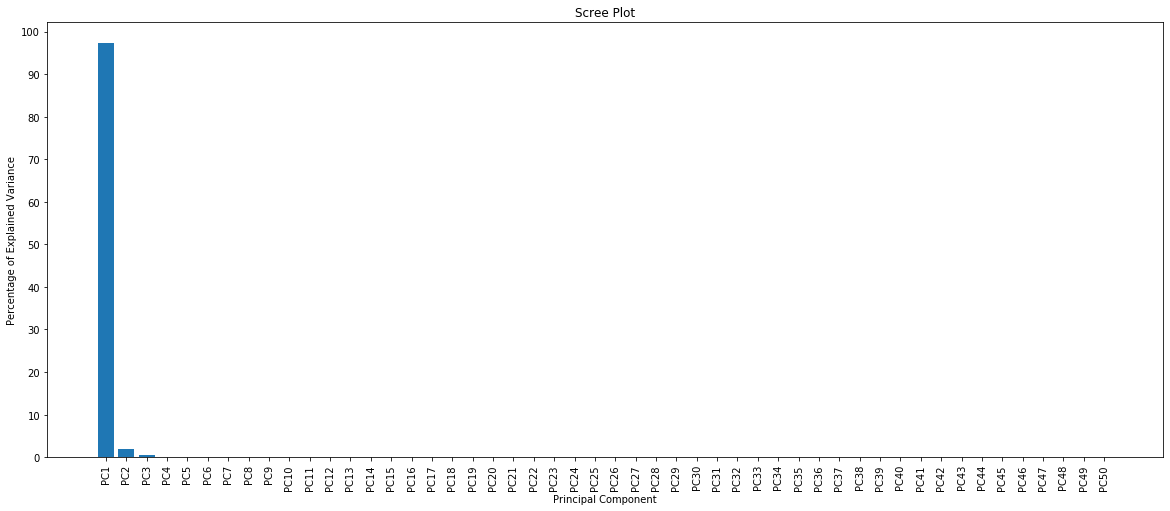

In [181]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.figure(figsize=(20,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation='vertical')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

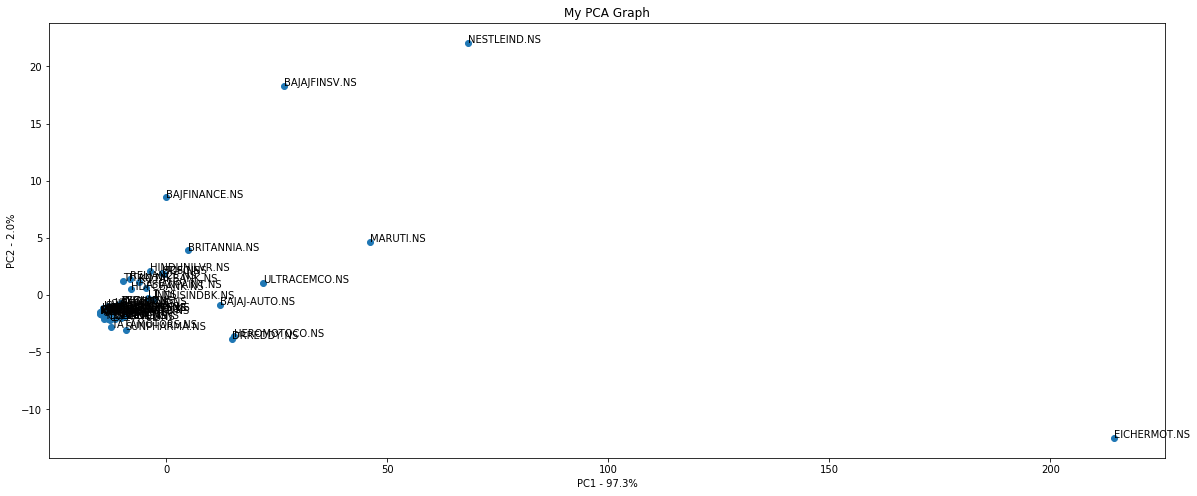

In [182]:
########  all PCA values wrt

new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)

pca_df=pd.DataFrame(pca_data,index=columns,columns=labels)
plt.figure(figsize=(20,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Pca Close

In [183]:
data=pd.read_csv('Close.csv')
data.set_index('Date',inplace=True)
data.head()

,ZEEL.NS,YESBANK.NS,ITC.NS,TATASTEEL.NS,TCS.NS,SBIN.NS,COALINDIA.NS,SUNPHARMA.NS,WIPRO.NS,VEDL.NS,...,M&M.NS,TITAN.NS,UPL.NS,HDFCBANK.NS,HEROMOTOCO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,KOTAKBANK.NS,INFRATEL.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,377.700012,154.509995,244.766998,385.334015,1272.780029,314.000000,380.049988,822.200012,207.149994,219.250000,...,618.525024,379.799988,227.733002,476.024994,3105.399902,1286.599976,349.970001,629.299988,339.299988,812.000000
2015-01-02,380.950012,158.440002,245.533005,391.337006,1289.719971,315.250000,381.750000,826.250000,208.988007,222.300003,...,612.325012,382.799988,234.832993,482.649994,3098.100098,1275.650024,344.375000,635.775024,337.200012,815.900024
2015-01-05,380.000000,158.779999,246.500000,397.005005,1270.119995,312.750000,380.250000,826.750000,209.363007,219.800003,...,609.224976,385.899994,230.466995,478.575012,3119.399902,1258.699951,343.475006,633.224976,342.399994,819.099976
2015-01-06,367.899994,154.330002,240.167007,377.760010,1223.300049,299.899994,379.950012,808.549988,204.468994,209.050003,...,605.825012,372.700012,219.300003,471.125000,3014.399902,1229.599976,342.584991,625.674988,341.549988,798.400024
2015-01-07,364.850006,151.470001,235.699997,370.519012,1208.849976,300.149994,374.700012,809.799988,202.912994,209.000000,...,612.075012,374.600006,215.367004,472.500000,2974.050049,1228.550049,349.559998,635.750000,342.649994,791.950012


In [184]:
### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

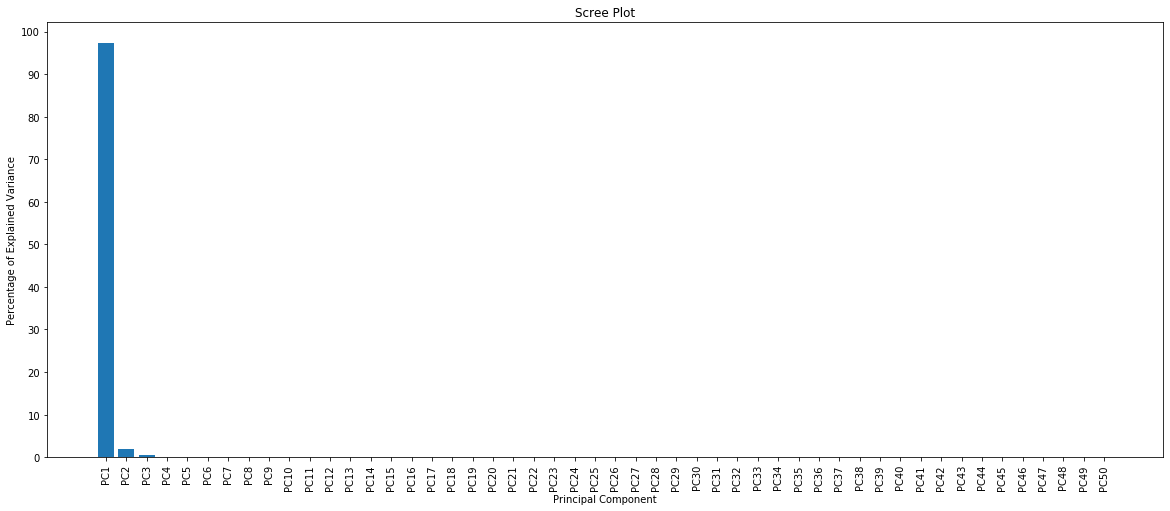

In [185]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.figure(figsize=(20,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation='vertical')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

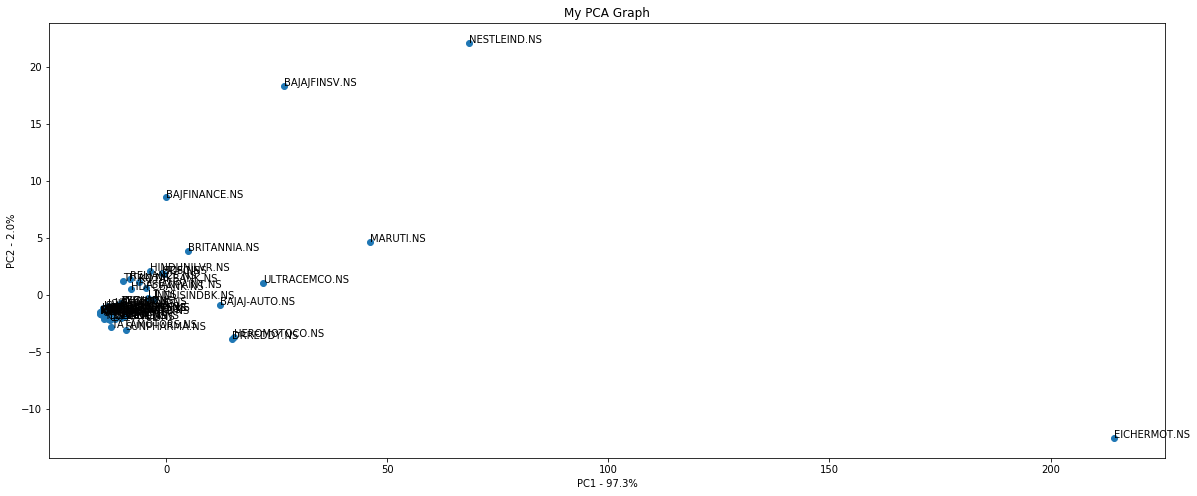

In [186]:
########  all PCA values wrt

new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)

pca_df=pd.DataFrame(pca_data,index=columns,columns=labels)
plt.figure(figsize=(20,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Pca volume

In [187]:
data=pd.read_csv('Volume.csv')
data.set_index('Date',inplace=True)
data.head()

### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


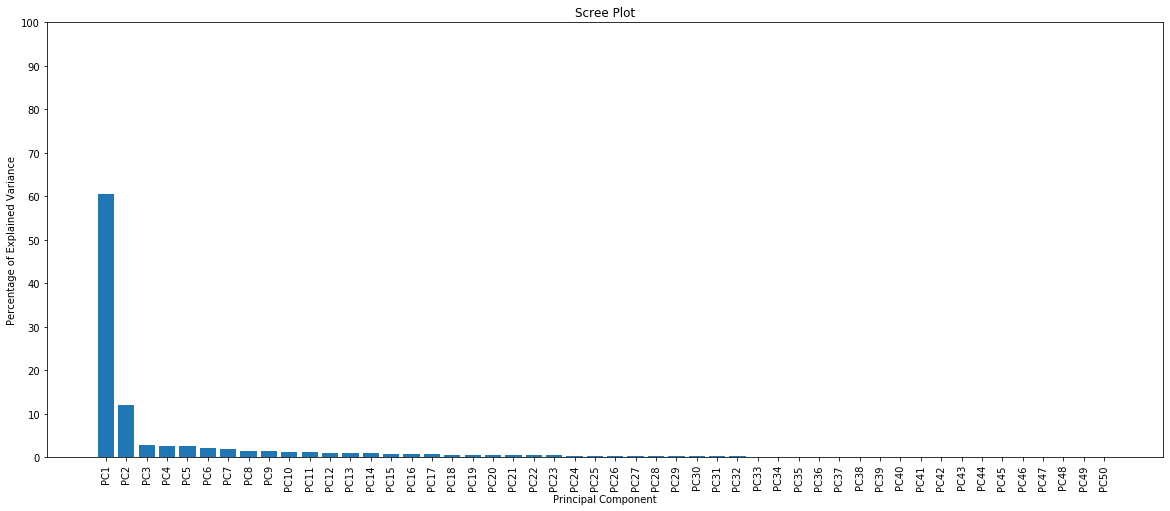

In [188]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.figure(figsize=(20,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation='vertical')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

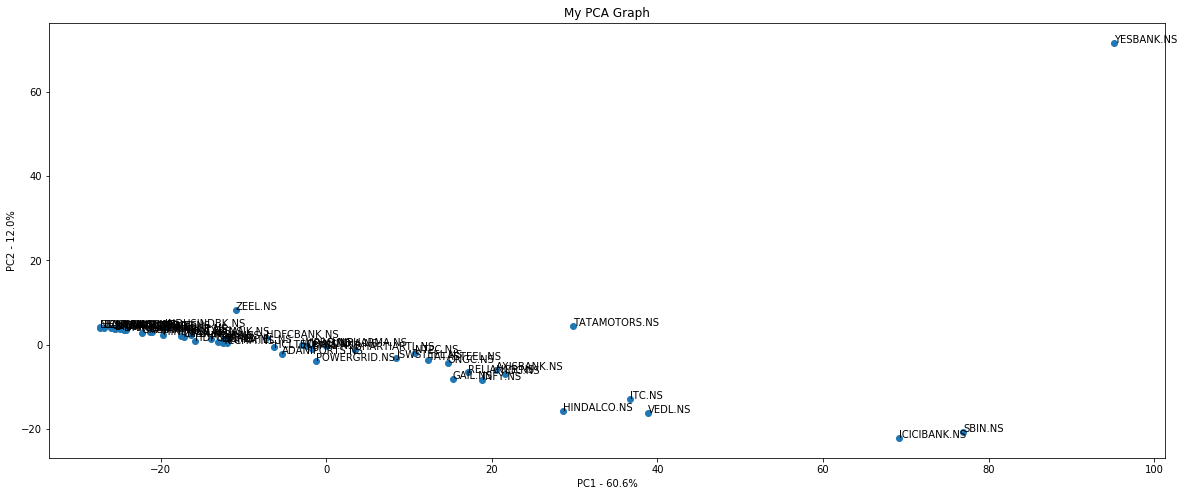

In [189]:
########  all PCA values wrt

new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)

pca_df=pd.DataFrame(pca_data,index=columns,columns=labels)
plt.figure(figsize=(20,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Pca AdjClose

In [190]:
data=pd.read_csv('AdjClose.csv')
data.set_index('Date',inplace=True)
data.head()

### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

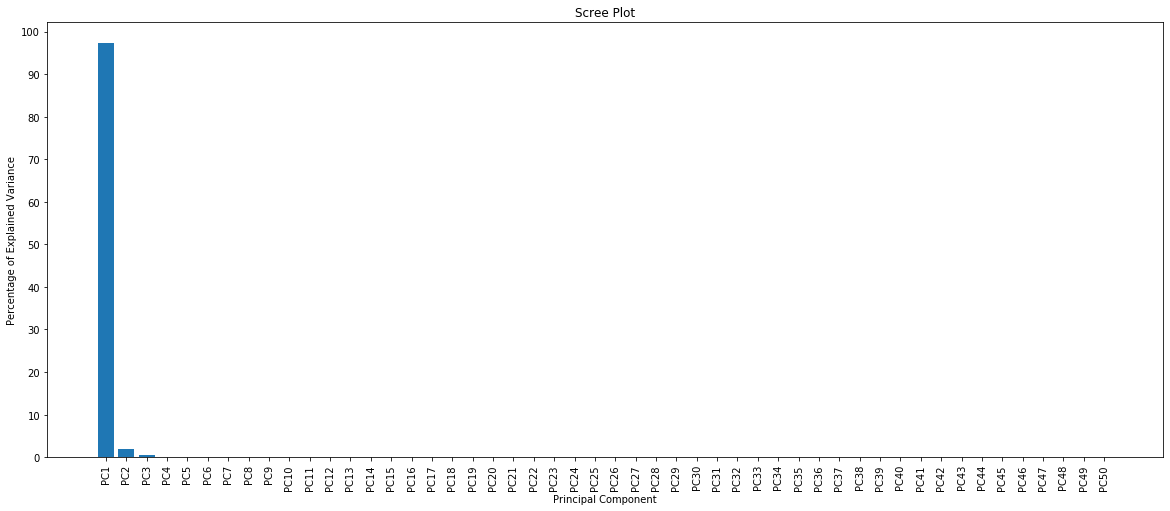

In [191]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.figure(figsize=(20,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation='vertical')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

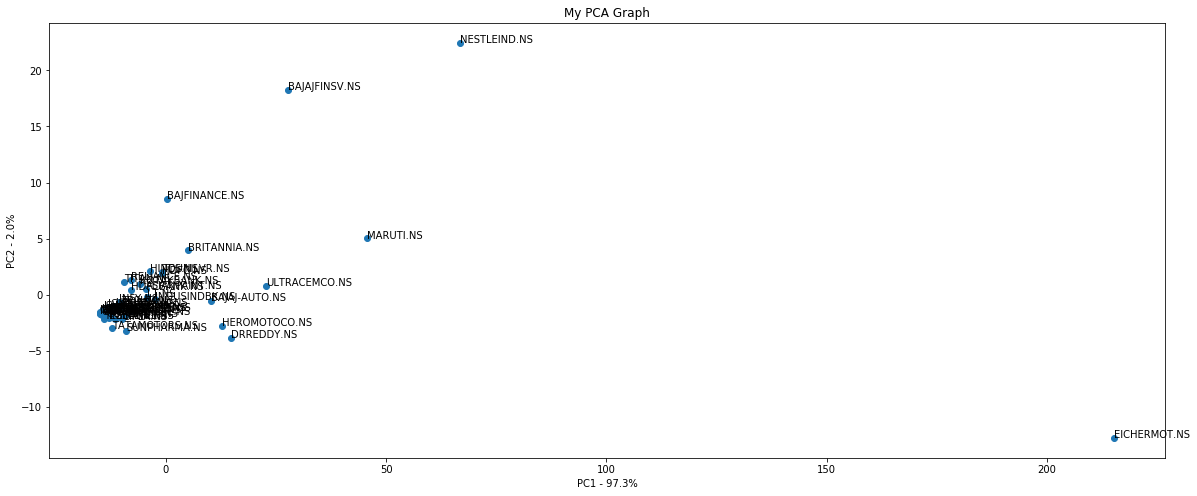

In [192]:
########  all PCA values wrt

new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)

pca_df=pd.DataFrame(pca_data,index=columns,columns=labels)
plt.figure(figsize=(20,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Pca High

In [193]:
data=pd.read_csv('High.csv')
data.set_index('Date',inplace=True)
data.head()

### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

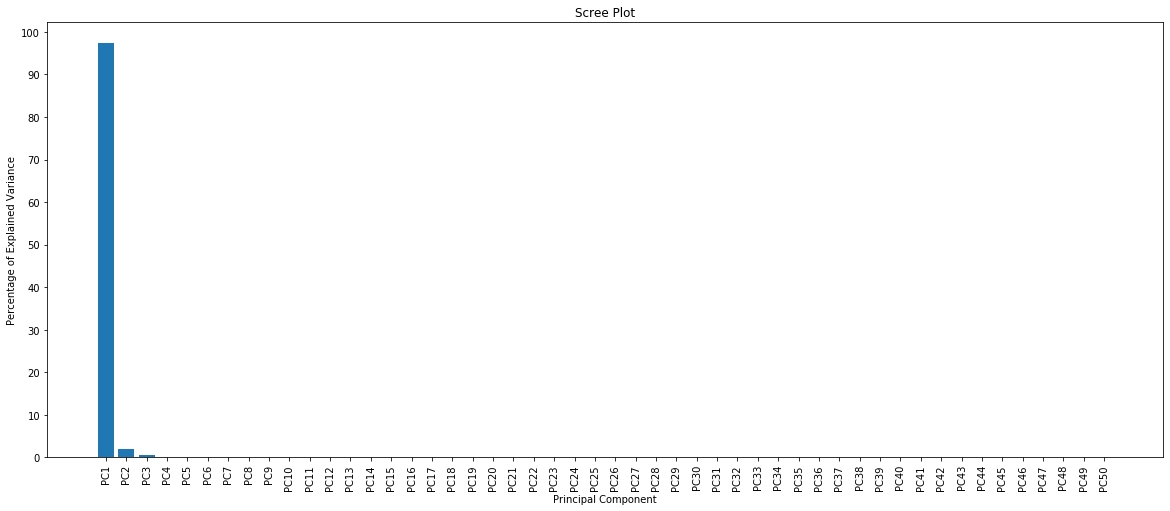

In [194]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.figure(figsize=(20,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation='vertical')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

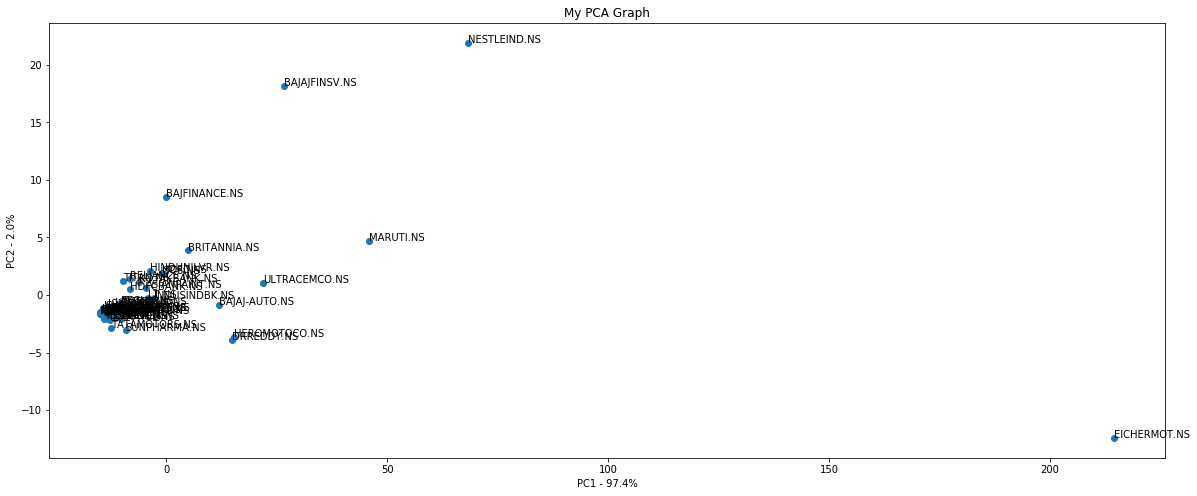

In [195]:
########  all PCA values wrt

new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)

pca_df=pd.DataFrame(pca_data,index=columns,columns=labels)
plt.figure(figsize=(20,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Pca Low

In [196]:
data=pd.read_csv('Low.csv')
data.set_index('Date',inplace=True)
data.head()

### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

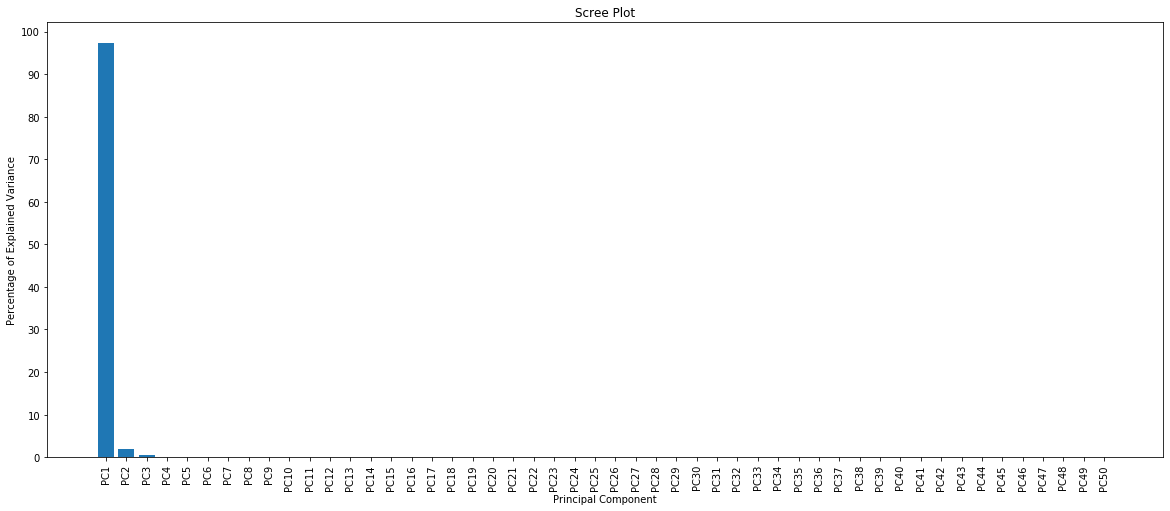

In [197]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.figure(figsize=(20,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation='vertical')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

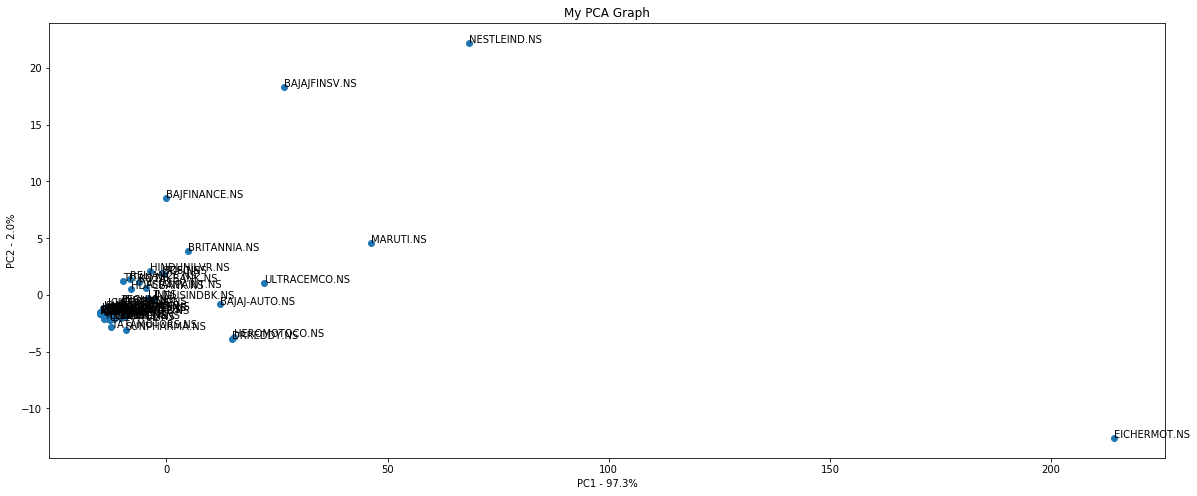

In [198]:
########  all PCA values wrt

new_df=pd.read_csv('tickets.csv')
tickers=new_df.Symbol.values
columns=list(tickers)

pca_df=pd.DataFrame(pca_data,index=columns,columns=labels)
plt.figure(figsize=(20,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()